In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- **date**: ngày tháng trong định dạng MM-DD-YYYY.
- **quarter**: phần của tháng — tháng được chia thành bốn quý.
- **department**: phòng ban liên quan đến mỗi trường hợp.
- **day**: ngày trong tuần.
- **team**: số đội liên quan đến mỗi trường hợp.
- **targeted_productivity**: năng suất mục tiêu được đặt bởi cơ quan cho từng đội vào mỗi ngày.
- **smv**: giá trị phút tiêu chuẩn — thời gian được phân bổ cho một nhiệm vụ.
- **wip**: công việc đang tiến hành — bao gồm số lượng sản phẩm chưa hoàn thành.
- **over_time**: thời gian làm thêm của từng đội (tính bằng phút).
- **incentive**: số tiền khuyến mãi tài chính (đơn vị BDT) để khuyến khích hành động cụ thể.
- **idle_time**: thời gian sản xuất bị gián đoạn do nhiều nguyên nhân.
- **idle_men**: số lượng công nhân bị rảnh do gián đoạn sản xuất.
- **no_of_style_change**: số lần thay đổi kiểu dáng của một sản phẩm cụ thể.
- **no_of_workers**: số lượng công nhân trong mỗi đội.
- **actual_productivity**: tỷ lệ năng suất thực tế được đạt được bởi công nhân — nằm trong khoảng từ 0 đến 1. 🌟

In [ ]:
df = pd.read_csv("garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# Dataset Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [ ]:
df["department"].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

=> Có 2 finishing

In [ ]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

=> không có ngày thứ 6. Có thể nhà máy không hoạt động vào ngày thứ 6, hoặc có thể do lỗi thu thập dữ liệu

In [ ]:
df[df["targeted_productivity"] > df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
(len(df[df["targeted_productivity"] > df["actual_productivity"]]) / len(df)) * 100

26.900584795321635

=> Có 26% quan sát cho thấy năng suất bình thường không đạt ngưỡng năng suất mục tiêu đề ra

In [ ]:
(len(df[df["targeted_productivity"] == df["actual_productivity"]]) / len(df)) * 100

0.5012531328320802

=> Có chưa tới 1% là năng suất bình thường bẵng ngưỡng năng suất đề ra

In [ ]:
(len(df[df["targeted_productivity"] < df["actual_productivity"]]) / len(df)) * 100

72.59816207184629

=> 72% quan sát cho thấy năng suất công nhân nhà máy vượt ngưỡng mục tiêu đề ra. Một điều cho thấy nhà máy hoạt động rất tốt

# Dataset Cleaning (I)

In [ ]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [ ]:
df["department"].replace({"finishing ": "finishing"}, inplace = True)

In [ ]:
df.drop(["date", "no_of_style_change", "incentive",
         "idle_time", "idle_men", "wip"], axis = 1, inplace = True)

- Cột date chỉ có từ tháng 1 đến tháng 3. Nên cột không có tác dụng.
- no_of_style_change (sự thay đổi trong sản phẩm): trong dữ liệu nhà máy may mặc, mọi thứ đều sản xuất theo dây chuyền, không phải bằng tay thủ công, rất khó để có thay đổi trong sản phầm.
- incentive (khuyến mãi cho công nhân): điều này không có tác động quá lớn cho công nhân, ngoại từ các đãi ngộ nghỉ lễ.

In [ ]:
df["no_of_workers"] = df["no_of_workers"].astype("int")

=>  Cột công nhân, không thể nào nói 1.2 công nhân được.

In [ ]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]

=> Tạo ra một cột mới có tên là “productive”. Cột này sẽ chứa các giá trị boolean, cho biết liệu mục tiêu về năng suất đã được đạt được cho mỗi quan sát trong tập dữ liệu hay không.

In [ ]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

=> Vì quarter5 quá thấp, nên ta gộp nó vào trong quarter4

In [ ]:
df["quarter"] = df["quarter"].str.replace("Quarter5", "Quarter4")

In [ ]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

# Dataset Cleaning (II)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

parent_col_trans = make_column_transformer((OneHotEncoder(), ["department", "quarter", "day", "team"]),
                                          remainder = "passthrough", verbose_feature_names_out=False)
one_hot_df = parent_col_trans.fit_transform(df)
df = pd.DataFrame(one_hot_df, columns = parent_col_trans.get_feature_names_out())
df

,department_finishing,department_sweing,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,team_9,team_10,team_11,team_12,targeted_productivity,smv,over_time,no_of_workers,actual_productivity,productive
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.8,26.16,7080,59,0.940725,True
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.75,3.94,960,8,0.8865,True
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.8,11.41,3660,30,0.80057,True
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.8,11.41,3660,30,0.80057,True
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.8,25.9,1920,56,0.800382,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.75,2.9,960,8,0.628333,False
1193,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.7,3.9,960,8,0.625625,False
1194,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.65,3.9,960,8,0.625625,False
1195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.75,2.9,1800,15,0.505889,False


# Building the Tree

In [ ]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i])



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

model = DecisionTreeClassifier(max_depth = 3, random_state = 47)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

# Visualizing and Evaluating the Tree

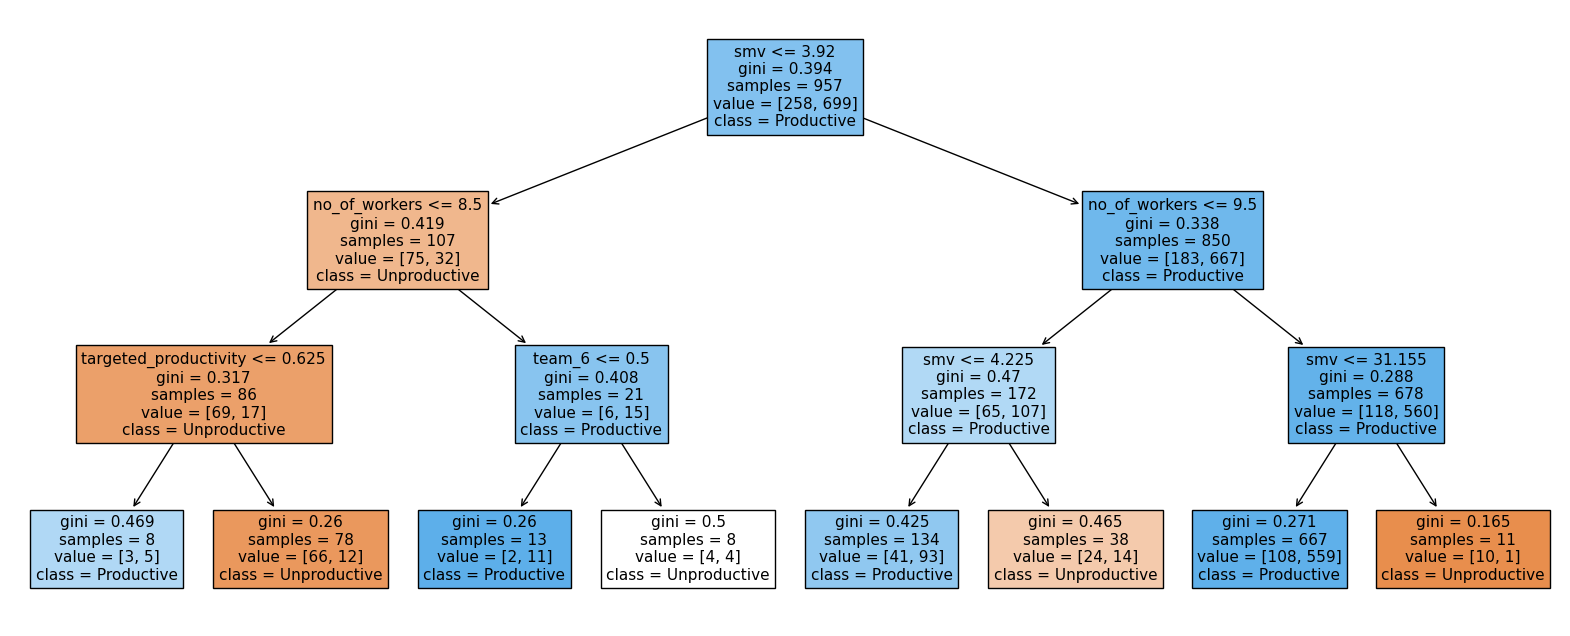

In [ ]:
plt.figure(figsize = [20.0, 8.0])
_ = plot_tree(model,
              feature_names = X.columns, class_names = ["Unproductive", "Productive"],
              filled = True,
              rounded = False,
              proportion = False,
              fontsize = 11)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8083333333333333

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 23,  41],
       [  5, 171]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.36      0.50        64
        True       0.81      0.97      0.88       176

    accuracy                           0.81       240
   macro avg       0.81      0.67      0.69       240
weighted avg       0.81      0.81      0.78       240



# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

tree = DecisionTreeClassifier(max_depth = 3, random_state = 47)
tree_c1 = cross_validate(tree, X, y, cv = 5,  scoring= ("precision", "recall", "f1") )

In [ ]:
tree_c1["test_precision"].mean()

0.7923950387765524

In [ ]:
tree_c1["test_recall"].mean()

0.9668571428571429

In [ ]:
tree_c1["test_f1"].mean()

0.8701961448628115

# Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]
rf = RandomForestClassifier(oob_score = True,
                                random_state = 24, n_jobs = -1, max_depth = 3, n_estimators = 20)
rf.fit(X, y)

y_pred_rf = rf.oob_decision_function_
y_accuracy = rf.oob_score_
y_accuracy

0.7719298245614035

# GridSearchCV

In [ ]:
df_class = df.copy()
df_class.drop("productive", axis = 1, inplace = True)

df_class["productive"] = pd.Series(dtype = "object")
df_class["productive"].mask(df_class["actual_productivity"] <= 0.2, "Very Insufficient", inplace = True)
df_class["productive"].mask((df_class["actual_productivity"] > 0.2) & (df_class["actual_productivity"] <= 0.4),
                            "Insufficient", inplace = True)
df_class["productive"].mask((df_class["actual_productivity"] > 0.4) & (df_class["actual_productivity"] <= 0.6),
                           "Satisfactory", inplace = True)
df_class["productive"].mask((df_class["actual_productivity"] > 0.6) & (df_class["actual_productivity"] <= 0.8),
                           "Very Satisfactory", inplace = True)
df_class["productive"].mask((df_class["actual_productivity"] > 0.8), "Perfect", inplace = True)

In [ ]:
from sklearn.model_selection import GridSearchCV

X = df_class.drop(["actual_productivity","productive"], axis = 1 )
y = df_class["productive"]

paramters = {
    "criterion": ["gini"],
    "max_depth": list(range(1, 10))
}

model = DecisionTreeClassifier(random_state = 24)
grid = GridSearchCV(model, param_grid = paramters)

grid.fit(X, y)

grid.best_score_

0.6774825662482566

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

# Random forest

In [ ]:
random_class = RandomForestClassifier(n_estimators=20, max_depth = 3, random_state = 24,
                                     oob_score= True)
random_class.fit(X, y)
random_class.oob_score_

0.6532999164578112

In [ ]:
df1 = pd.DataFrame(random_class.oob_decision_function_, columns = random_class.classes_)
df1["y_pred"] = df1.idxmax(axis = 1)
df1["y_test"] = y
df1

,Insufficient,Perfect,Satisfactory,Very Satisfactory,y_pred,y_test
0,0.046102,0.536749,0.093375,0.323774,Perfect,Perfect
1,0.099203,0.388826,0.177377,0.334594,Perfect,Perfect
2,0.022045,0.700555,0.055512,0.221887,Perfect,Perfect
3,0.031035,0.699404,0.052651,0.216910,Perfect,Perfect
4,0.050298,0.573125,0.084075,0.292501,Perfect,Perfect
...,...,...,...,...,...,...
1192,0.091169,0.472426,0.138883,0.297523,Perfect,Very Satisfactory
1193,0.095621,0.398139,0.168890,0.337351,Perfect,Very Satisfactory
1194,0.113656,0.383241,0.172812,0.330291,Perfect,Very Satisfactory
1195,0.071914,0.511770,0.112903,0.303413,Perfect,Satisfactory
